Implementing Linear Regression model 

Estimate and plot different error metrics (RMSE, MSE, MAE, Average Error) in a 20 runs of a simple Linear Regression model.
***Each runs has a different 20/80 test training split, and with the stratified data***

In [ ]:
%load_ext jupyter_black

In [ ]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

from utils import get_clean_dataset

In [ ]:
df = get_clean_dataset()

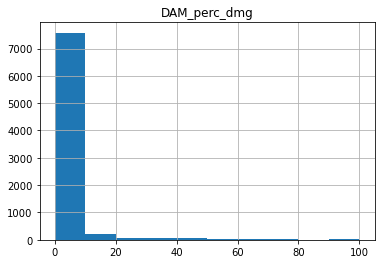

In [1]:

# Show histogram of damage
df.hist(column="DAM_perc_dmg")

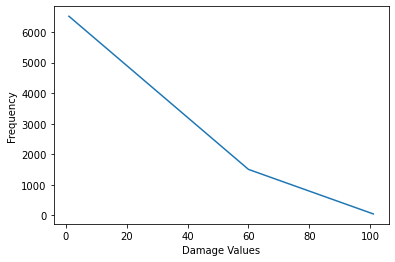

In [2]:
#The chosen bins
bins2= [0, 1, 60, 101]
samples_per_bin2, binsP2 = np.histogram(df['DAM_perc_dmg'], bins=bins2)
plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(binsP2[1:],samples_per_bin2)

In [3]:
print(samples_per_bin2)
print(binsP2)

[6517 1506   50]
[  0   1  60 101]


In [4]:
bin_index2=np.digitize(df['DAM_perc_dmg'], bins=binsP2)

In [5]:
y_input_strat=bin_index2

In [6]:
#df['DAM_perc_dmg'][bin_index2==1]

In [7]:
#Dropping highly correlated features which their correlation values are greater than 0.99.
features =[
    'HAZ_rainfall_Total', 
    'HAZ_rainfall_max_6h',
    'HAZ_rainfall_max_24h',
    'HAZ_v_max',
    'HAZ_v_max_3',
    'HAZ_dis_track_min',
    'GEN_landslide_per',
    'GEN_stormsurge_per',
    #'GEN_Bu_p_inSSA', 
    #'GEN_Bu_p_LS', 
    'GEN_Red_per_LSbldg',
    'GEN_Or_per_LSblg', 
    'GEN_Yel_per_LSSAb', 
    #'GEN_RED_per_SSAbldg',
    'GEN_OR_per_SSAbldg',
    'GEN_Yellow_per_LSbl',
    'TOP_mean_slope',
    'TOP_mean_elevation_m', 
    'TOP_ruggedness_stdev', 
    #'TOP_mean_ruggedness',
    #'TOP_slope_stdev', 
    'VUL_poverty_perc',
    'GEN_with_coast',
    'GEN_coast_length', 
    'VUL_Housing_Units',
    'VUL_StrongRoof_StrongWall', 
    'VUL_StrongRoof_LightWall',
    'VUL_StrongRoof_SalvageWall', 
    'VUL_LightRoof_StrongWall',
    'VUL_LightRoof_LightWall', 
    'VUL_LightRoof_SalvageWall',
    'VUL_SalvagedRoof_StrongWall',
    'VUL_SalvagedRoof_LightWall',
    'VUL_SalvagedRoof_SalvageWall', 
    'VUL_vulnerable_groups',
    'VUL_pantawid_pamilya_beneficiary'
]

# Split X and y from dataframe features
X = df[features]
display(df[features])
y = df["DAM_perc_dmg"]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

train_RMSE_list=[]
test_RMSE_list=[]

train_MSE_list=[]
test_MSE_list=[]

train_MAE_list=[]
test_MAE_list=[]

train_AVE_list=[]
test_AVE_list=[]

for i in range(20):
    std_err_list=[]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,df['DAM_perc_dmg'], stratify=y_input_strat, test_size=0.2)

    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())
   
    #std_err_list.append(est2.bse) 
  
    
    y_pred_train = regressor.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mx_train = max_error(y_train, y_pred_train)
    me_train = (y_pred_train - y_train).sum()/len(y_train)

    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mx = max_error(y_test, y_pred)
    me = (y_pred - y_test).sum()/len(y_test)
    

    print('----- Test  ------')
    print(f'Mean absolute error: {mae:.2f}')
    print(f'Mean squared error: {mse:.2f}')
    print(f'Root mean squared error: {rmse:.2f}')
    print(f'Max error: {mx:.2f}')
    print(f"Average Error: {me:.2f}")

    print('---- Training -----')
    print(f'Mean absolute error: {mae_train:.2f}')
    print(f'Mean squared error: {mse_train:.2f}')
    print(f'Root mean squared error: {rmse_train:.2f}')
    print(f'Max error: {mx_train:.2f}')
    print(f"Average Error: {me_train:.2f}")
    
    score = regressor.score(X_train, y_train)  
    print("Training score coefficient of determination for Regression R^2: %.3f " % (score))
    
    test_RMSE_list.append(rmse)
    train_RMSE_list.append(rmse_train)
    
    test_MSE_list.append(mse)
    train_MSE_list.append(mse_train)
    
    test_MAE_list.append(mae)
    train_MAE_list.append(mae_train)
    
    test_AVE_list.append(me)
    train_AVE_list.append(me_train)
    


,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_v_max_3,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Red_per_LSbldg,GEN_Or_per_LSblg,...,VUL_StrongRoof_LightWall,VUL_StrongRoof_SalvageWall,VUL_LightRoof_StrongWall,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary
0,185.828571,14.716071,7.381696,55.032241,166667.757548,2.478142,2.64,6.18,1.17,0.03,...,8.211552,0.097425,2.533055,41.892832,1.002088,0.000000,0.027836,0.083507,2.951511,46.931106
2,8.818750,0.455208,0.255319,8.728380,664.968323,288.358553,0.06,0.00,0.06,0.00,...,33.639236,0.850008,1.218595,13.645253,0.549120,0.030089,0.090266,0.112833,3.338873,25.989168
4,24.175000,2.408333,0.957639,10.945624,1311.358762,274.953818,1.52,1.28,0.02,0.00,...,22.963749,0.197179,0.667374,15.592295,0.075838,0.000000,0.015168,0.075838,2.131755,32.185651
6,14.930000,1.650000,0.586250,12.108701,1775.385328,252.828578,0.00,0.00,0.00,0.00,...,16.179723,0.279362,0.675125,7.100454,0.023280,0.011640,0.000000,0.128041,1.589369,29.612385
7,13.550000,1.054167,0.528125,10.660943,1211.676901,258.194381,5.52,0.36,0.00,0.00,...,32.522996,0.065703,0.821288,30.354796,0.000000,0.000000,0.032852,0.000000,1.387007,35.052562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,9.700000,0.408333,0.216146,8.136932,538.743551,277.107823,1.80,6.25,0.12,0.00,...,19.563863,0.186916,3.613707,32.492212,0.311526,0.031153,0.155763,0.031153,2.827833,31.308411
25837,17.587500,1.414583,0.386458,9.818999,946.676507,305.789817,0.00,0.00,0.00,0.00,...,13.456446,0.209059,0.383275,4.703833,0.027875,0.000000,0.034843,0.097561,1.073268,12.766551
25838,11.487500,0.614583,0.230319,15.791907,3938.254316,210.313249,0.06,0.09,0.06,0.00,...,22.347376,0.202748,0.090110,3.063753,0.022528,0.000000,0.067583,0.022528,1.140109,9.348952
25839,11.600000,1.400000,0.412766,13.867145,2666.620370,218.189328,0.00,0.00,0.00,0.00,...,29.584121,0.000000,0.094518,3.119093,0.000000,0.000000,0.000000,0.000000,2.837537,21.928166


                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:07   Log-Likelihood:                -21478.
No. Observations:                6458   AIC:                         4.302e+04
Df Residuals:                    6426   BIC:                         4.324e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4797      0.084     29.511      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:07   Log-Likelihood:                -21687.
No. Observations:                6458   AIC:                         4.344e+04
Df Residuals:                    6426   BIC:                         4.366e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5562      0.087     29.457      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     187.8
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:07   Log-Likelihood:                -21469.
No. Observations:                6458   AIC:                         4.300e+04
Df Residuals:                    6426   BIC:                         4.322e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4514      0.084     29.215      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     181.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:08   Log-Likelihood:                -21409.
No. Observations:                6458   AIC:                         4.288e+04
Df Residuals:                    6426   BIC:                         4.310e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4245      0.083     29.164      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     188.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:08   Log-Likelihood:                -21451.
No. Observations:                6458   AIC:                         4.297e+04
Df Residuals:                    6426   BIC:                         4.318e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4428      0.084     29.201      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     182.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:08   Log-Likelihood:                -21531.
No. Observations:                6458   AIC:                         4.313e+04
Df Residuals:                    6426   BIC:                         4.334e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4761      0.085     29.224      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:37:08   Log-Likelihood:                -21503.
No. Observations:                6458   AIC:                         4.307e+04
Df Residuals:                    6426   BIC:                         4.329e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4472      0.084     29.013      0.0

stdev_AVERAGE_test: 0.18
stdev_AVERAGE_train: 0.00
mean_AVERAGE_test: 0.03
mean_AVERAGE_train: 0.00


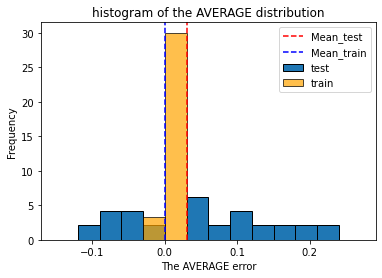

In [8]:
#Average Error

m_test_ave = statistics.mean(test_AVE_list)
plt.axvline(m_test_ave, color='red', linestyle='dashed')
plt.hist(test_AVE_list, bins=np.arange(-0.15,0.3,0.03), edgecolor='k', histtype ='bar', density=True)
sd_test_ave = statistics.stdev(test_AVE_list)


m_train_ave = statistics.mean(train_AVE_list)
plt.axvline(m_train_ave, color='b', linestyle='dashed')
plt.hist(train_AVE_list, color='orange', edgecolor='k', bins=np.arange(-0.15,0.3,0.03), histtype ='bar', density=True, alpha=0.7)

sd_train_ave = statistics.stdev(train_AVE_list)

print(f'stdev_AVERAGE_test: {sd_test_ave:.2f}')
print(f'stdev_AVERAGE_train: {sd_train_ave:.2f}')

print(f'mean_AVERAGE_test: {m_test_ave:.2f}')
print(f'mean_AVERAGE_train: {m_train_ave:.2f}')


#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The AVERAGE error')
plt.ylabel('Frequency')
plt.title('histogram of the AVERAGE distribution')
plt.show()

stdev_MAE_test: 0.10
stdev_MAE_train: 0.04
mean_MAE_test: 3.10
mean_MAE_train: 3.09


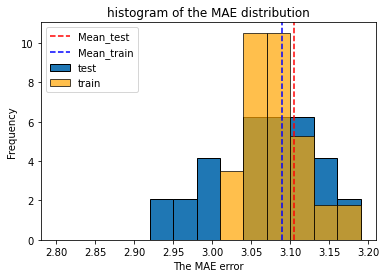

In [9]:
#MAE

m_test_mae = statistics.mean(test_MAE_list)
plt.axvline(m_test_mae, color='red', linestyle='dashed')
plt.hist(test_MAE_list, bins=np.arange(2.8,3.2,0.03), edgecolor='k', histtype ='bar', density=True)
sd_test_mae = statistics.stdev(test_MAE_list)
#plt.axvline(m+sd, color='b', linestyle='dashed')
#plt.axvline(m-sd, color='b', linestyle='dashed')


m_train_mae = statistics.mean(train_MAE_list)
plt.axvline(m_train_mae, color='b', linestyle='dashed')
plt.hist(train_MAE_list, color='orange', edgecolor='k', bins=np.arange(2.8,3.2,0.03), histtype ='bar', density=True, alpha=0.7)

sd_train_mae = statistics.stdev(train_MAE_list)
#plt.axvline(m+sd, color='y', linestyle='dashed')
#plt.axvline(m-sd, color='y', linestyle='dashed')

print(f'stdev_MAE_test: {sd_test_mae:.2f}')
print(f'stdev_MAE_train: {sd_train_mae:.2f}')

print(f'mean_MAE_test: {m_test_mae:.2f}')
print(f'mean_MAE_train: {m_train_mae:.2f}')


#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The MAE error')
plt.ylabel('Frequency')
plt.title('histogram of the MAE distribution')
plt.show()

stdev_RMSE_test: 0.31
stdev_RMSE_train: 0.08
mean_RMSE_test: 6.80
mean_RMSE_train: 6.75


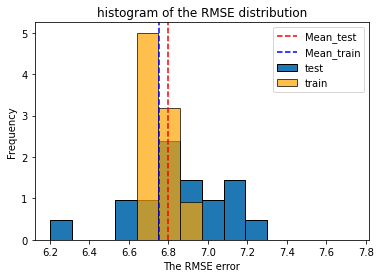

In [10]:
#RMSE

m_test_rmse = statistics.mean(test_RMSE_list)
plt.axvline(m_test_rmse, color='red', linestyle='dashed')
plt.hist(test_RMSE_list, bins=np.arange(6.2,7.8,0.11), #color='b',
         edgecolor='k', histtype ='bar', density=True, #alpha=0.5
        )
sd_test_rmse = statistics.stdev(test_RMSE_list)
#plt.axvline(m+sd, color='b', linestyle='dashed')
#plt.axvline(m-sd, color='b', linestyle='dashed')


m_train_rmse = statistics.mean(train_RMSE_list)
plt.axvline(m_train_rmse, color='b', linestyle='dashed')
plt.hist(train_RMSE_list, bins=np.arange(6.2,7.8,0.11), color='orange', edgecolor='k', histtype ='bar', density=True, alpha=0.7)

sd_train_rmse = statistics.stdev(train_RMSE_list)
#plt.axvline(m+sd, color='y', linestyle='dashed')
#plt.axvline(m-sd, color='y', linestyle='dashed')

print(f'stdev_RMSE_test: {sd_test_rmse:.2f}')
print(f'stdev_RMSE_train: {sd_train_rmse:.2f}')

print(f'mean_RMSE_test: {m_test_rmse:.2f}')
print(f'mean_RMSE_train: {m_train_rmse:.2f}')

#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The RMSE error')
plt.ylabel('Frequency')
plt.title('histogram of the RMSE distribution')
plt.show()

stdev_MSE_test: 4.12
stdev_MSE_train: 1.03
mean_MSE_test: 46.32
mean_MSE_train: 45.60


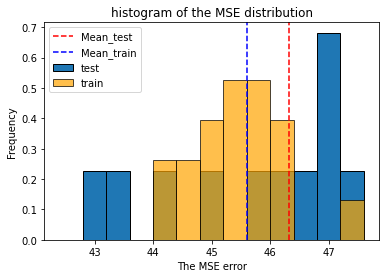

In [11]:
#MSE

m_test_mse = statistics.mean(test_MSE_list)
plt.axvline(m_test_mse, color='red', linestyle='dashed')
plt.hist(test_MSE_list, bins=np.arange(42.4,47.8,0.4), #color='b',
         edgecolor='k', histtype ='bar', density=True)

m_train_mse = statistics.mean(train_MSE_list)
plt.axvline(m_train_mse, color='b', linestyle='dashed')
plt.hist(train_MSE_list, color='orange', bins=np.arange(42.4,47.8,0.4), edgecolor='k', histtype ='bar', density=True, alpha=0.7)

sd_train_mse = statistics.stdev(train_MSE_list)
sd_test_mse = statistics.stdev(test_MSE_list)

print(f'stdev_MSE_test: {sd_test_mse:.2f}')
print(f'stdev_MSE_train: {sd_train_mse:.2f}')

print(f'mean_MSE_test: {m_test_mse:.2f}')
print(f'mean_MSE_train: {m_train_mse:.2f}')


#create legend
colors_2 = ["lime", "blue"]
labels_2= ["test","train"]
#plt.legend(labels_2)


#create legend
colors = ["tan", "red"]
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The MSE error')
plt.ylabel('Frequency')
plt.title('histogram of the MSE distribution')
plt.show()

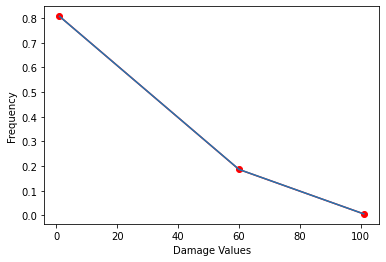

In [12]:
#Plot of damaged values Vs the degree of repetition 
samples_per_bin_train, bins_t, = np.histogram(y_train, bins=bins2)
samples_per_bin_test, bins_t, = np.histogram(y_test, bins=bins2)

plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(bins_t[1:],samples_per_bin_test/sum(samples_per_bin_test),'r-o')
plt.plot(bins_t[1:],samples_per_bin_train/sum(samples_per_bin_train))

Codes in the following cells displays the estimated errors in a single run of Linear Regression Model.

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Feature 0 HAZ_rainfall_Total:, Score: -1.64898
Feature 1 HAZ_rainfall_max_6h:, Score: 1.28386
Feature 2 HAZ_rainfall_max_24h:, Score: 1.20890
Feature 3 HAZ_v_max:, Score: -4.88715
Feature 4 HAZ_v_max_3:, Score: 9.23657
Feature 5 HAZ_dis_track_min:, Score: -0.55802
Feature 6 GEN_landslide_per:, Score: -36.96344
Feature 7 GEN_stormsurge_per:, Score: 0.41015
Feature 8 GEN_Red_per_LSbldg:, Score: 22.06018
Feature 9 GEN_Or_per_LSblg:, Score: 0.25508
Feature 10 GEN_Yel_per_LSSAb:, Score: 29.55289
Feature 11 GEN_OR_per_SSAbldg:, Score: -0.10315
Feature 12 GEN_Yellow_per_LSbl:, Score: -0.10542
Feature 13 TOP_mean_slope:, Score: 0.11274
Feature 14 TOP_mean_elevation_m:, Score: -0.40813
Feature 15 TOP_ruggedness_stdev:, Score: -0.10194
Feature 16 VUL_poverty_perc:, Score: -3.03162
Feature 17 GEN_with_coast:, Score: 0.22953
Feature 18 GEN_coast_length:, Score: -0.13458
Feature 19 VUL_Housing_Units:, Score: -0.25207
Feature 20 VUL_StrongRoof_StrongWall:, Score: -2.23207
Feature 21 VUL_StrongRoof_L

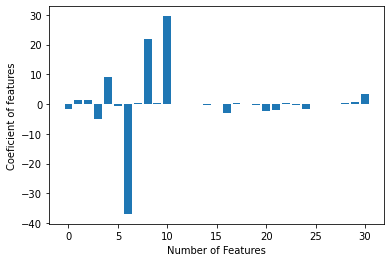

In [14]:
importance = regressor.coef_
#print(importance)
for i,j in enumerate(importance):
    print('Feature %0d ' %(i) + X.columns[i]+':, Score: %.5f' % (j))

#plt.figure(figsize=(16,16))
plt.bar([X for X in range(len(importance))], importance)

plt.xlabel("Number of Features")
plt.ylabel("Coeficient of features")
plt.show()

In [15]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     180.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:38:12   Log-Likelihood:                -21515.
No. Observations:                6458   AIC:                         4.309e+04
Df Residuals:                    6426   BIC:                         4.331e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4392      0.084     28.867      0.0

In [16]:
y_pred_train = regressor.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mx_train = max_error(y_train, y_pred_train)
me_train = (y_pred_train - y_train).sum()/len(y_train)

y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mx = max_error(y_test, y_pred)
me = (y_pred - y_test).sum()/len(y_test)

print('----- Test  ------')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Max error: {mx:.2f}')
print(f"Average Error: {me:.2f}")

print('---- Training -----')
print(f'Mean absolute error: {mae_train:.2f}')
print(f'Mean squared error: {mse_train:.2f}')
print(f'Root mean squared error: {rmse_train:.2f}')
print(f'Max error: {mx_train:.2f}')
print(f"Average Error: {me_train:.2f}")

----- Test  ------
Mean absolute error: 3.13
Mean squared error: 45.19
Root mean squared error: 6.72
Max error: 66.13
Average Error: -0.08
---- Training -----
Mean absolute error: 3.07
Mean squared error: 45.85
Root mean squared error: 6.77
Max error: 92.42
Average Error: 0.00


In [17]:
score = regressor.score(X_train, y_train)  
print("Training score coefficient of determination for Regression R^2: %.3f " % (score))

Training score coefficient of determination for Regression R^2: 0.465 
